In [1]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install import_ipynb

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import import_ipynb
from Week1_data_analysis_season import summer_events,winter_events

importing Jupyter notebook from Week1_data_analysis_season.ipynb


## A summary of the various descriptive statistics

**Initially, the analysis focuses on the disparities between the two genders**

In [4]:
#Summer Olympics:
print(pysqldf('''SELECT Sex,
                        COUNT(*) AS count,            
                        COUNT(*) * 100.0 / SUM(COUNT(*)) over () AS ratio
                 FROM summer_events
                 GROUP BY Sex'''))

  Sex   count      ratio
0   F   59443  26.709713
1   M  163109  73.290287


In [5]:
#Winter Olympics:
print(pysqldf('''SELECT Sex,
                    COUNT(*) AS count,            
                    COUNT(*) * 100.0 / SUM(COUNT(*)) over () AS ratio
                 FROM winter_events
                 GROUP BY Sex'''))

  Sex  count      ratio
0   F  15079  31.049749
1   M  33485  68.950251


While the ratio of Summer Olympics to Winter Olympics is different, men tend to have greater dominance. Initially, I assumed that the proportion of women to men had increased over time, and I delved into investigating it.

In [6]:
#Summer Olympics:
print(pysqldf('''SELECT Sex,
                        AVG(Age),
                        AVG(Height),
                        AVG(Weight)
                 FROM summer_events
                 GROUP BY Sex
                 '''))

  Sex   AVG(Age)  AVG(Height)  AVG(Weight)
0   F  23.660997   168.169025    60.087644
1   M  26.443944   178.901874    75.604195


In [7]:
#Winter Olympics:
print(pysqldf('''SELECT Sex,
                        AVG(Age),
                        AVG(Height),
                        AVG(Weight)
                 FROM winter_events
                 GROUP BY Sex
                 '''))

  Sex   AVG(Age)  AVG(Height)  AVG(Weight)
0   F  24.014398   166.528250    59.755156
1   M  25.504261   178.668699    76.357058


The analysis reveals noteworthy variations between male and female athletes, not only in terms of their height and weight but also in their age. 

1. While the former two differences can be explained by biological factors, the latter may require additional factors to be considered, such as social factors. 

2. Additionally, it is worth noting that the age difference between male and female athletes is significantly smaller in the Winter Olympics, with a difference of approximately 2.8 years and 1.5 years, respectively.

**Additional analysis is required to examine the number and proportion of medals. Specifically, I assessed the ratio of total medal winners and the fluctuations in the proportion of various medals.**

In [8]:
#Summer Olympics:
summer_medals = pysqldf('''
                    SELECT
                      Year,
                      CAST(medal_count AS FLOAT) / total_count AS medal_ratio,
                      CAST(gold_count AS FLOAT) / medal_count AS gold_ratio,
                      CAST(silver_count AS FLOAT) / medal_count AS silver_ratio,
                      CAST(bronze_count AS FLOAT) / medal_count AS bronze_ratio
                    FROM
                    (
                         SELECT
                             Year,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               summer_events
                             GROUP BY
                               Year 
                        )new_table
                       ''')

In [9]:
#Winter Olympics:
winter_medals = pysqldf('''
                    SELECT
                      Year,
                      CAST(medal_count AS FLOAT) / total_count AS medal_ratio,
                      CAST(gold_count AS FLOAT) / medal_count AS gold_ratio,
                      CAST(silver_count AS FLOAT) / medal_count AS silver_ratio,
                      CAST(bronze_count AS FLOAT) / medal_count AS bronze_ratio
                    FROM
                    (
                         SELECT
                             Year,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               winter_events
                             GROUP BY
                               Year 
                        )new_table
                       ''')

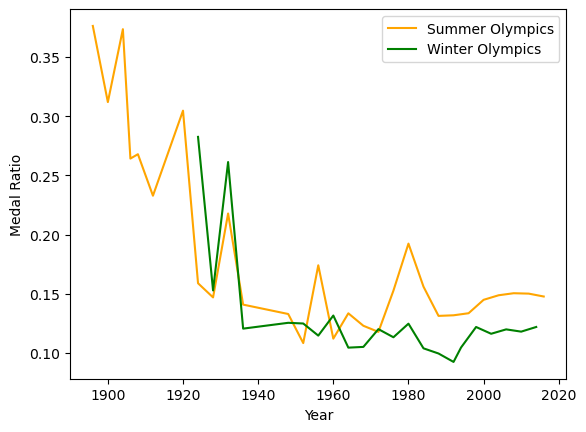

In [10]:
plt.plot(summer_medals.Year, summer_medals.medal_ratio, color="orange", label="Summer Olympics")
plt.plot(winter_medals.Year, winter_medals.medal_ratio, color="green", label="Winter Olympics")
plt.xlabel("Year")
plt.ylabel("Medal Ratio")
plt.legend()

Over the past century, there were significant fluctuations in the medal ratio for both competitions, but eventually, it stabilized. This can be interpreted as the establishment of norms regarding these issues.

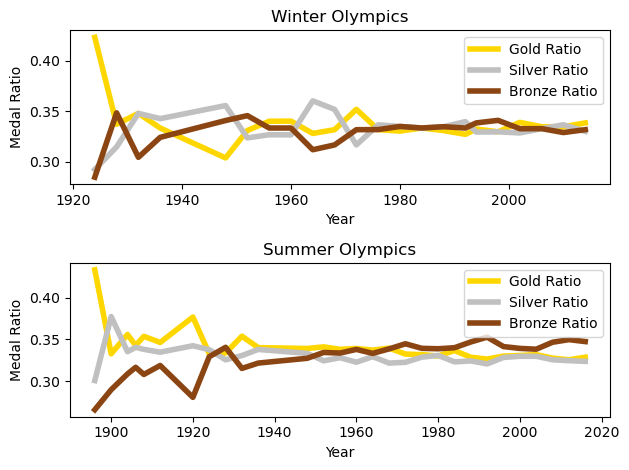

In [11]:
fig, ax = plt.subplots(2)
ax[0].plot(winter_medals.Year, winter_medals.gold_ratio, marker='', color='gold', linewidth=4, label = "Gold Ratio")
ax[0].plot(winter_medals.Year, winter_medals.silver_ratio, marker='', color='silver', linewidth=4, label = "Silver Ratio")
ax[0].plot(winter_medals.Year, winter_medals.bronze_ratio, marker='', color='saddlebrown', linewidth=4, label = "Bronze Ratio")
ax[0].legend(loc=1)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Medal Ratio")
ax[0].set_title("Winter Olympics")
ax[1].plot(summer_medals.Year, summer_medals.gold_ratio, marker='', color='gold', linewidth=4, label = "Gold Ratio")
ax[1].plot(summer_medals.Year, summer_medals.silver_ratio, marker='', color='silver', linewidth=4, label = "Silver Ratio")
ax[1].plot(summer_medals.Year, summer_medals.bronze_ratio, marker='', color='saddlebrown', linewidth=4, label = "Bronze Ratio")
ax[1].legend(loc=1)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Medal Ratio")
ax[1].set_title("Summer Olympics")
plt.tight_layout()

The percentages of gold, silver, and bronze medals have reached a stable point, which could be attributed to the factors discussed above.

#### Findings:

1. The age gap between male and female participants in the Winter Olympics is smaller than that in the Summer Olympics.
2. In recent Olympics, the percentage of participants who won medals and the ratio of medals (gold:silver:bronze) have stabilized.
3. The number of participants in the Summer and Winter Olympics differs significantly, so it is essential to analyze them separately.

## Hypotheses

Initially, I hypothesized that the proportion of female participants has increased over time. To investigate this, I generated a table of the female-to-male ratio for each year and plotted it on a line graph to visualize the trend.

In [12]:
m_f_ratio_summer = pysqldf('''SELECT Year, CAST(SUM(CASE WHEN Sex = "F" THEN 1 ELSE 0 END) AS float) / CAST(SUM(CASE WHEN Sex = "M" THEN 1 ELSE 0 END) AS float) AS Ratio FROM summer_events GROUP BY Year''')
m_f_ratio_winter = pysqldf('''SELECT Year, CAST(SUM(CASE WHEN Sex = "F" THEN 1 ELSE 0 END) AS float) / CAST(SUM(CASE WHEN Sex = "M" THEN 1 ELSE 0 END) AS float) AS Ratio FROM winter_events GROUP BY Year''')

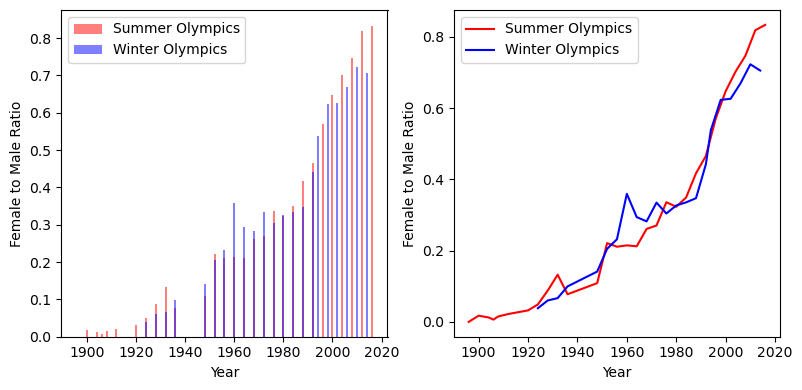

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Bar chart
ax1.bar(m_f_ratio_summer.Year, m_f_ratio_summer.Ratio, label="Summer Olympics", color='red', alpha=0.5)
ax1.bar(m_f_ratio_winter.Year, m_f_ratio_winter.Ratio, label="Winter Olympics", color='blue', alpha=0.5)
ax1.set_xlabel("Year")
ax1.set_ylabel("Female to Male Ratio")
ax1.legend()

# Line chart
ax2.plot(m_f_ratio_summer.Year, m_f_ratio_summer.Ratio, color='red', label="Summer Olympics")
ax2.plot(m_f_ratio_winter.Year, m_f_ratio_winter.Ratio, color='blue', label="Winter Olympics")
ax2.set_xlabel("Year")
ax2.set_ylabel("Female to Male Ratio")
ax2.legend()

ax2.annotate('Peak in 1996 and 2018', xy=(1996, 1.4), xytext=(1980, 1.6),
arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()


**My initial hypothesis was correct:** The female-to-male ratio has decreased over time. However, there is an intriguing observation in the data. During the Second World War, the ratio of women participants sharply declined in the Summer Olympics, but later it resumed its upward trend. I cannot explain this phenomenon without conducting further analysis.